In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from numpy import NaN as NA
import re
import seaborn as sns
from operator import itemgetter, attrgetter

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

# Making Brazil Ecommerce dataset

In [2]:
df1 = pd.read_csv('./Brazil_ecommerce/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp'])
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [3]:
len(df1['order_id'].unique())

99441

In [4]:
len(df1['customer_id'].unique())

99441

In [5]:
df4 = pd.read_csv('./Brazil_ecommerce/olist_customers_dataset.csv')
df4

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [6]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
df2 = pd.read_csv('./Brazil_ecommerce/olist_order_payments_dataset.csv')
df2

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [8]:
df = df1.merge(df2, on=['order_id'])
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   customer_id                    103886 non-null  object        
 2   order_status                   103886 non-null  object        
 3   order_purchase_timestamp       103886 non-null  datetime64[ns]
 4   order_approved_at              103711 non-null  object        
 5   order_delivered_carrier_date   101998 non-null  object        
 6   order_delivered_customer_date  100754 non-null  object        
 7   order_estimated_delivery_date  103886 non-null  object        
 8   payment_sequential             103886 non-null  int64         
 9   payment_type                   103886 non-null  object        
 10  payment_installments           103886 non-null  int64         
 11  

In [10]:
df= pd.merge(df, df4, on=['customer_id'])
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [11]:
df = df[['customer_unique_id','order_purchase_timestamp','payment_value']]
df.columns = ['Customer ID','Order Date','Sales']
df['Order Date']=pd.to_datetime(df['Order Date'].dt.strftime('%Y-%m-%d'))
df

<ipython-input-11-b878428e8976>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date']=pd.to_datetime(df['Order Date'].dt.strftime('%Y-%m-%d'))


,Customer ID,Order Date,Sales
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,18.12
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2.00
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,18.59
3,af07308b275d755c9edb36a90c618231,2018-07-24,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,179.12
...,...,...,...
103881,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09,85.08
103882,da62f9e57a76d978d02ab5362c509660,2018-02-06,195.00
103883,737520a9aad80b3fbbdad19b66b37b30,2017-08-27,271.01
103884,5097a5312c8b157bb7be58ae360ef43c,2018-01-08,441.16


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Customer ID  103886 non-null  object        
 1   Order Date   103886 non-null  datetime64[ns]
 2   Sales        103886 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.2+ MB


In [13]:
df.to_csv('Brazil_Ecommerce.csv',encoding='utf-8-sig',index=False)
df

,Customer ID,Order Date,Sales
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,18.12
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2.00
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,18.59
3,af07308b275d755c9edb36a90c618231,2018-07-24,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,179.12
...,...,...,...
103881,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09,85.08
103882,da62f9e57a76d978d02ab5362c509660,2018-02-06,195.00
103883,737520a9aad80b3fbbdad19b66b37b30,2017-08-27,271.01
103884,5097a5312c8b157bb7be58ae360ef43c,2018-01-08,441.16


## 1. 월별 구매건수/구매금액(합산) 그래프 그리기

In [14]:
df_2 = pd.DataFrame(df.groupby('Order Date').count()['Customer ID'])
df_2['매출'] = df.groupby('Order Date').sum()['Sales']
df_2.columns = ['구매건수','매출']
df_2

,구매건수,매출
Order Date,,
2016-09-04,1,136.23
2016-09-05,1,75.06
2016-09-13,1,40.95
2016-10-02,1,109.34
2016-10-03,8,595.14
...,...,...
2018-09-29,1,137.03
2018-10-01,1,80.38
2018-10-03,1,197.55


In [15]:
df3 = df_2.resample('M').sum()

In [16]:
df3

,구매건수,매출
Order Date,,
2016-09-30,3,252.24
2016-10-31,342,59090.48
2016-11-30,0,0.00
2016-12-31,1,19.62
2017-01-31,850,138488.04
2017-02-28,1886,291908.01
2017-03-31,2837,449863.60
2017-04-30,2571,417788.03
2017-05-31,3944,592918.82


In [17]:
g3 = df3.groupby(pd.Grouper( freq='Y'))
dfs3 = [group for _,group in g3]
dfs3

[            구매건수        매출
 Order Date                
 2016-09-30     3    252.24
 2016-10-31   342  59090.48
 2016-11-30     0      0.00
 2016-12-31     1     19.62,
             구매건수          매출
 Order Date                  
 2017-01-31   850   138488.04
 2017-02-28  1886   291908.01
 2017-03-31  2837   449863.60
 2017-04-30  2571   417788.03
 2017-05-31  3944   592918.82
 2017-06-30  3436   511276.38
 2017-07-31  4317   592382.92
 2017-08-31  4550   674396.32
 2017-09-30  4516   727762.45
 2017-10-31  4860   779677.88
 2017-11-30  7863  1194882.80
 2017-12-31  5895   878401.48,
             구매건수          매출
 Order Date                  
 2018-01-31  7563  1115004.18
 2018-02-28  6952   992463.34
 2018-03-31  7512  1159652.12
 2018-04-30  7209  1160785.48
 2018-05-31  7135  1153982.15
 2018-06-30  6419  1023880.50
 2018-07-31  6507  1066540.75
 2018-08-31  6698  1022425.32
 2018-09-30    16     4439.54
 2018-10-31     4      589.67]

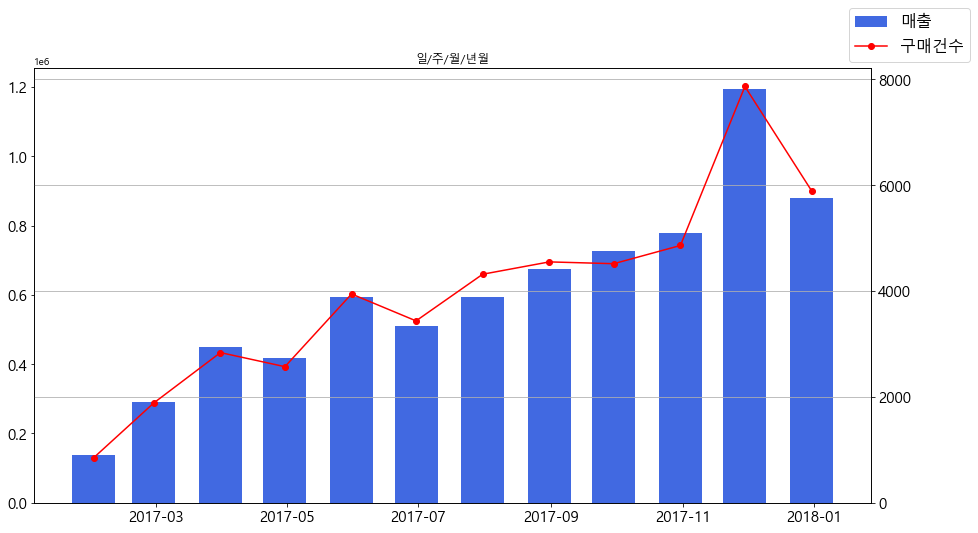

In [67]:
plt.rcParams["figure.figsize"] = (15,8)
fig, ax1 = plt.subplots(1,1)
plt.xticks(fontsize=15)

# dfs3[i]의 i를 바꾸면서 그림가능
ax1.bar(dfs3[1].index, dfs3[1]['매출'], color='royalblue',label='매출', width=20) 
ax1.tick_params(axis = 'y', labelsize =15)
ax2 = ax1.twinx()
ax2.plot(dfs3[1].index, dfs3[1]['구매건수'],color='red',label='구매건수', marker='o')
ax2.set_yticks([i*2000 for i in range(5)])
ax2.tick_params(axis = 'y', labelsize =15)


plt.rc('legend', fontsize=16)
plt.grid(True, axis='y')
plt.title('일/주/월/년월')
fig.legend()
plt.show()

## 2. 누적 구매횟수별 분석 -> Stacked Bar 로 시각화

In [19]:
df_user = pd.DataFrame(df.groupby(['Customer ID']).count()['Sales'])
df_user['매출'] = df.groupby(['Customer ID']).sum()['Sales']
df_user.columns = ['유저별 총 구매횟수','매출']
df_user

,유저별 총 구매횟수,매출
Customer ID,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19
0000f46a3911fa3c0805444483337064,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,1,43.62
0004aac84e0df4da2b147fca70cf8255,1,196.89
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,1,84.58
ffff371b4d645b6ecea244b27531430a,1,112.46


In [20]:
# 원본데이터와 합친다.
df_user_final = pd.merge(df,df_user, on=['Customer ID']) # 고객명이 키가 된다.
df_user_final.drop(['매출'],axis=1,inplace=True) # 매출 컬럼은 삭제
df_user_final['주문년도/월'] = df_user_final['Order Date'].dt.strftime('%Y-%m') # 주문날짜(년-월)컬럼생성
df_user_final['주문년도/월'] = pd.to_datetime(df_user_final['주문년도/월'])
df_user_final

,Customer ID,Order Date,Sales,유저별 총 구매횟수,주문년도/월
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,18.12,4,2017-10-01
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2.00,4,2017-10-01
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,18.59,4,2017-10-01
3,7c396fd4830fd04220f754e42b4e5bff,2017-09-04,44.11,4,2017-09-01
4,af07308b275d755c9edb36a90c618231,2018-07-24,141.46,1,2018-07-01
...,...,...,...,...,...
103881,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09,85.08,1,2017-03-01
103882,da62f9e57a76d978d02ab5362c509660,2018-02-06,195.00,1,2018-02-01
103883,737520a9aad80b3fbbdad19b66b37b30,2017-08-27,271.01,1,2017-08-01
103884,5097a5312c8b157bb7be58ae360ef43c,2018-01-08,441.16,1,2018-01-01


In [21]:
df_user_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Customer ID  103886 non-null  object        
 1   Order Date   103886 non-null  datetime64[ns]
 2   Sales        103886 non-null  float64       
 3   유저별 총 구매횟수   103886 non-null  int64         
 4   주문년도/월       103886 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 4.8+ MB


In [22]:
df_user2 = pd.DataFrame(df_user_final.groupby(['주문년도/월','유저별 총 구매횟수']).sum()['Sales'])
df_user3 = df_user2.unstack().T
df_user3 = df_user3.fillna(0) # 결측치 0 대입
df_user3

주문년도/월            2016-09-01  2016-10-01  2016-12-01  2017-01-01  2017-02-01  \
      유저별 총 구매횟수                                                               
Sales 1               252.24    56049.54        0.00   123399.80   268552.54   
      2                 0.00     2738.33       19.62    12003.87    19590.88   
      3                 0.00      170.27        0.00     1857.98     1798.57   
      4                 0.00       45.46        0.00       73.48     1074.12   
      5                 0.00        0.00        0.00      666.71      614.61   
      6                 0.00        0.00        0.00      110.72        0.00   
      7                 0.00       86.88        0.00        0.00       66.90   
      8                 0.00        0.00        0.00        0.00        0.00   
      9                 0.00        0.00        0.00        0.00        0.00   
      10                0.00        0.00        0.00        0.00        0.00   
      11                0.00        0.00        0.00      227.90      210.39   
      12                0.00        0.00        0.00        0.00        0.00   
      13                0.00        0.00        0.00        0.00        0.00   
      14                0.00        0.00        0.00        0.00        0.00   
      15                0.00        0.00        0.00        0.00        0.00   
      16                0.00        0.00        0.00      147.58        0.00   
      17                0.00        0.00        0.00        0.00        0.00   
      19                0.00        0.00        0.00        0.00        0.00   
      22                0.00        0.00        0.00        0.00        0.00   
      23                0.00        0.00        0.00        0.00        0.00   
      26                0.00        0.00        0.00        0.00        0.00   
      29                0.00        0.00        0.00        0.00        0.00   
      33                0.00        0.00        0.00        0.00        0.00   

주문년도/월            2017-03-01  2017-04-01  2017-05-01  2017-06-01  2017-07-01  \
      유저별 총 구매횟수                                                               
Sales 1            410332.52   369758.84   524913.23   461427.98   526886.71   
      2             32061.71    41856.83    54427.45    39227.66    51434.45   
      3              4248.09     3945.06    10102.97     6719.57     7738.35   
      4              1061.33     1195.18      678.99     1627.45     2609.83   
      5               178.46       28.42      197.22      837.37     1042.36   
      6              1149.72       43.52     1183.56      333.22      472.50   
      7               163.91      101.14        0.00      552.65      263.47   
      8                39.52      263.57      217.49      118.25       72.83   
      9                 0.00        0.00        0.00        0.00      850.10   
      10                0.00        0.00        0.00        0.00        0.00   
      11                0.00      137.48      164.73      317.80      147.15   
      12                0.00        0.00        0.00        0.00      329.22   
      13              107.27        0.00      186.92        0.00      123.07   
      14                0.00        0.00        0.00        0.00      126.64   
      15                0.00        0.00      740.76        0.00        0.00   
      16                0.00        0.00        0.00        0.00        0.00   
      17                0.00        0.00       22.77       51.75      214.07   
      19                0.00        0.00       82.73        0.00        0.00   
      22                0.00        0.00        0.00        0.00        0.00   
      23              521.07        0.00        0.00        0.00        0.00   
      26                0.00        0.00        0.00       62.68        0.00   
      29                0.00      457.99        0.00        0.00        0.00   
      33                0.00        0.00        0.00        0.00       72.17   

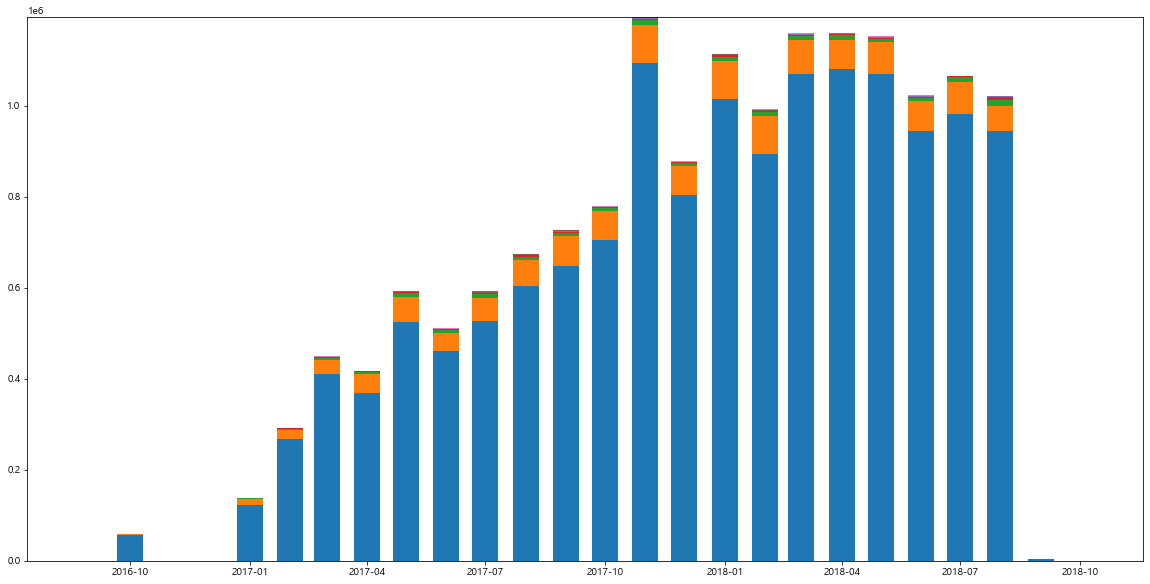

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
width=20
ax.bar(df_user3.columns, df_user3.iloc[0,:],width=width,label='1번 구매자')
for i in range(1,23) :
    ax.bar(df_user3.columns, df_user3.iloc[i,:],width=width, bottom=df_user3.iloc[0:i,:].sum(axis=0))

plt.show()

## 3. 구매횟수별 분석 -> Stacked Bar 로 시각화
- 2번에서는 유저당 누적 등장횟수로 그림을 그렸다면, 여기서는 등장할때마다 번호를 매겨 매 구매 건에 대해 랭크를 매김

In [47]:
df['Rank'] = df.groupby('Customer ID')['Order Date'].rank(method='min')
df

<ipython-input-47-c55823f35bf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rank'] = df.groupby('Customer ID')['Order Date'].rank(method='min')


,Customer ID,Order Date,Sales,Rank,주문년도/월
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,18.12,2.0,2017-10-01
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2.00,2.0,2017-10-01
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,18.59,2.0,2017-10-01
3,af07308b275d755c9edb36a90c618231,2018-07-24,141.46,1.0,2018-07-01
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,179.12,1.0,2018-08-01
...,...,...,...,...,...
103881,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09,85.08,1.0,2017-03-01
103882,da62f9e57a76d978d02ab5362c509660,2018-02-06,195.00,1.0,2018-02-01
103883,737520a9aad80b3fbbdad19b66b37b30,2017-08-27,271.01,1.0,2017-08-01
103884,5097a5312c8b157bb7be58ae360ef43c,2018-01-08,441.16,1.0,2018-01-01


In [48]:
df['주문년도/월'] = df['Order Date'].dt.strftime('%Y-%m') # 주문날짜(년-월)컬럼생성
df['주문년도/월'] = pd.to_datetime( df['주문년도/월'])
df

<ipython-input-48-ee7366f02a26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['주문년도/월'] = df['Order Date'].dt.strftime('%Y-%m') # 주문날짜(년-월)컬럼생성
<ipython-input-48-ee7366f02a26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['주문년도/월'] = pd.to_datetime( df['주문년도/월'])


,Customer ID,Order Date,Sales,Rank,주문년도/월
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,18.12,2.0,2017-10-01
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2.00,2.0,2017-10-01
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,18.59,2.0,2017-10-01
3,af07308b275d755c9edb36a90c618231,2018-07-24,141.46,1.0,2018-07-01
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,179.12,1.0,2018-08-01
...,...,...,...,...,...
103881,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09,85.08,1.0,2017-03-01
103882,da62f9e57a76d978d02ab5362c509660,2018-02-06,195.00,1.0,2018-02-01
103883,737520a9aad80b3fbbdad19b66b37b30,2017-08-27,271.01,1.0,2017-08-01
103884,5097a5312c8b157bb7be58ae360ef43c,2018-01-08,441.16,1.0,2018-01-01


In [49]:
df3 = df.groupby(['주문년도/월','Rank']).sum()['Sales'].to_frame().unstack().T
df3 = df3.droplevel(0, axis=0) # multi인덱스 제거
df3 = df3.fillna(0) # 결측치 = 0
df3

주문년도/월,2016-09-01,2016-10-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,...,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01
Rank,,,,,,,,,,,,,,,,,,,,,
1.0,252.24,59048.55,19.62,138299.07,291043.93,448430.40,414195.45,584037.15,504110.06,579911.22,...,1089048.32,972207.52,1134021.95,1129536.13,1117394.22,990334.23,1038271.42,981540.67,3076.35,89.71
2.0,0.00,41.93,0.00,188.97,555.45,1288.01,3289.65,8128.94,6505.39,11600.88,...,22486.97,17568.28,21980.19,27073.32,30992.32,27307.78,24369.33,30638.00,1114.52,302.41
3.0,0.00,0.00,0.00,0.00,129.33,49.52,302.93,752.73,660.93,491.78,...,2151.21,1640.32,2770.01,3023.16,3820.06,3087.03,3561.03,8262.27,248.67,197.55
4.0,0.00,0.00,0.00,0.00,179.30,0.00,0.00,0.00,0.00,167.25,...,381.36,339.33,492.07,491.60,1098.87,2262.01,200.71,1179.42,0.00,0.00
5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,211.79,...,296.61,145.39,256.26,608.74,265.19,411.75,0.00,364.38,0.00,0.00
6.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,263.78,196.45,131.64,52.53,295.16,282.60,0.00,122.08,0.00,0.00
7.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,187.43,0.00,0.00,0.00,0.00,195.10,0.00,0.00,0.00,0.00
8.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,242.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,123.69,0.00,0.00,0.00,0.00,0.00,149.00,0.00,0.00


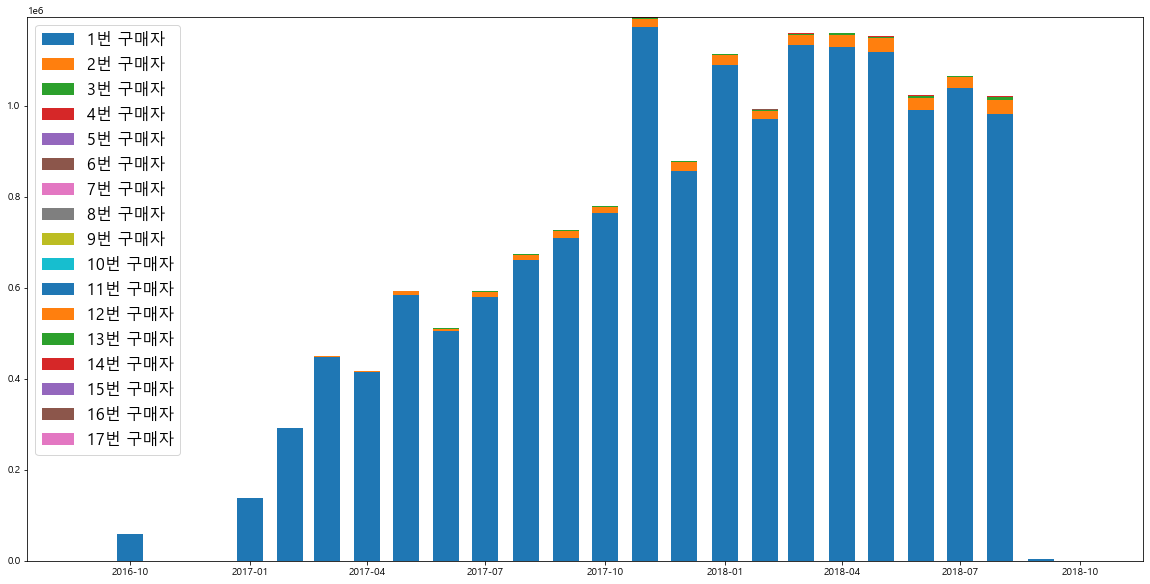

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
width=20
ax.bar(df3.columns, df3.iloc[0,:],width=width,label='1번 구매자')
for i in range(1,17) :
    ax.bar(df3.columns, df3.iloc[i,:], bottom=df3.iloc[0:i,:].sum(axis=0), width=width, label=f'{i+1}번 구매자')
    
plt.legend()
plt.show()

## 4. 코호트 재구매율

In [52]:
df_rank_first = df[df['Rank']==1][['Customer ID','주문년도/월']]
df_rank_first

,Customer ID,주문년도/월
3,af07308b275d755c9edb36a90c618231,2018-07-01
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-01
5,7c142cf63193a1473d2e66489a9ae977,2017-11-01
6,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-01
7,80bb27c7c16e8f973207a5086ab329e2,2017-07-01
...,...,...
103881,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-01
103882,da62f9e57a76d978d02ab5362c509660,2018-02-01
103883,737520a9aad80b3fbbdad19b66b37b30,2017-08-01
103884,5097a5312c8b157bb7be58ae360ef43c,2018-01-01


In [53]:
df_total = pd.merge(df,df_rank_first,on=['Customer ID'])
df_total = df_total[['Customer ID','주문년도/월_x','주문년도/월_y']]

In [54]:
df_total

,Customer ID,주문년도/월_x,주문년도/월_y
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,2017-09-01
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,2017-09-01
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,2017-09-01
3,7c396fd4830fd04220f754e42b4e5bff,2017-09-01,2017-09-01
4,af07308b275d755c9edb36a90c618231,2018-07-01,2018-07-01
...,...,...,...
125002,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-01,2017-03-01
125003,da62f9e57a76d978d02ab5362c509660,2018-02-01,2018-02-01
125004,737520a9aad80b3fbbdad19b66b37b30,2017-08-01,2017-08-01
125005,5097a5312c8b157bb7be58ae360ef43c,2018-01-01,2018-01-01


In [55]:
df_total.columns = ['Customer ID','Order Date','First 0rder Date']
df_total

,Customer ID,Order Date,First 0rder Date
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,2017-09-01
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,2017-09-01
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,2017-09-01
3,7c396fd4830fd04220f754e42b4e5bff,2017-09-01,2017-09-01
4,af07308b275d755c9edb36a90c618231,2018-07-01,2018-07-01
...,...,...,...
125002,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-01,2017-03-01
125003,da62f9e57a76d978d02ab5362c509660,2018-02-01,2018-02-01
125004,737520a9aad80b3fbbdad19b66b37b30,2017-08-01,2017-08-01
125005,5097a5312c8b157bb7be58ae360ef43c,2018-01-01,2018-01-01


In [56]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125007 entries, 0 to 125006
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Customer ID       125007 non-null  object        
 1   Order Date        125007 non-null  datetime64[ns]
 2   First 0rder Date  125007 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 3.8+ MB


In [57]:
df_total['First 0rder Date'].dt.to_period('Q')

0         2017Q3
1         2017Q3
2         2017Q3
3         2017Q3
4         2018Q3
           ...  
125002    2017Q1
125003    2018Q1
125004    2017Q3
125005    2018Q1
125006    2018Q1
Name: First 0rder Date, Length: 125007, dtype: period[Q-DEC]

In [58]:
ts = df_total['Order Date'].dt.to_period('Q')- df_total['First 0rder Date'].dt.to_period('Q')

for i in range(len(ts)) :
    ts[i] =str(ts[i]).split('<')[1].split('*')[0].strip()
ts

ts2 = ts.to_frame()
ts2.columns=['Quarter Diff']
ts2.head(100)

,Quarter Diff
0,QuarterEnd: startingMonth=12>
1,QuarterEnd: startingMonth=12>
2,QuarterEnd: startingMonth=12>
3,0
4,0
...,...
95,0
96,0
97,0
98,0


In [59]:
for i in range(len(ts2)) :
    if ts2.iloc[i,:].values not in ['0','2','3','4','5','6','7','8','9','10','11','12','13','14','15'] :
        ts2.iloc[i,:] = 1
ts2 = ts2.apply(pd.to_numeric)
ts2.head(30)

,Quarter Diff
0,1
1,1
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [60]:
df_total['Order Date'] = df_total['Order Date'].dt.to_period('Q')
df_total['First 0rder Date'] = df_total['First 0rder Date'].dt.to_period('Q')
df_total2 = pd.concat([df_total, ts2], axis=1)
df_total2

,Customer ID,Order Date,First 0rder Date,Quarter Diff
0,7c396fd4830fd04220f754e42b4e5bff,2017Q4,2017Q3,1
1,7c396fd4830fd04220f754e42b4e5bff,2017Q4,2017Q3,1
2,7c396fd4830fd04220f754e42b4e5bff,2017Q4,2017Q3,1
3,7c396fd4830fd04220f754e42b4e5bff,2017Q3,2017Q3,0
4,af07308b275d755c9edb36a90c618231,2018Q3,2018Q3,0
...,...,...,...,...
125002,6359f309b166b0196dbf7ad2ac62bb5a,2017Q1,2017Q1,0
125003,da62f9e57a76d978d02ab5362c509660,2018Q1,2018Q1,0
125004,737520a9aad80b3fbbdad19b66b37b30,2017Q3,2017Q3,0
125005,5097a5312c8b157bb7be58ae360ef43c,2018Q1,2018Q1,0


In [61]:
grouped3 = df_total2.groupby(['First 0rder Date','Quarter Diff'])
grouped3

In [62]:
# 각 유저별로 구한다,.
cohort_q = grouped3['Customer ID'].nunique()
cohort_q.head(30)

First 0rder Date  Quarter Diff
2016Q3            0                   3
2016Q4            0                 322
                  1                   1
                  2                   1
                  3                   2
                  4                   1
                  5                   2
                  6                   4
2017Q1            0                5152
                  1                  51
                  2                  31
                  3                  31
                  4                  40
                  5                  23
                  6                  11
2017Q2            0                9087
                  1                  94
                  2                  86
                  3                  58
                  4                  52
                  5                  31
2017Q3            0               12208
                  1                 126
                  2                 102
         

In [63]:
cohort_q2 = cohort_q.to_frame()
cohort_q2.reset_index(inplace=True)
cohort_q2

,First 0rder Date,Quarter Diff,Customer ID
0,2016Q3,0,3
1,2016Q4,0,322
2,2016Q4,1,1
3,2016Q4,2,1
4,2016Q4,3,2
5,2016Q4,4,1
6,2016Q4,5,2
7,2016Q4,6,4
8,2017Q1,0,5152
9,2017Q1,1,51


In [64]:
cohort_q2 = cohort_q2.pivot(index='First 0rder Date', columns='Quarter Diff')
cohort_q2

Customer ID                                      
Quarter Diff               0      1      2     3     4     5     6
First 0rder Date                                                  
2016Q3                   3.0    NaN    NaN   NaN   NaN   NaN   NaN
2016Q4                 322.0    1.0    1.0   2.0   1.0   2.0   4.0
2017Q1                5152.0   51.0   31.0  31.0  40.0  23.0  11.0
2017Q2                9087.0   94.0   86.0  58.0  52.0  31.0   NaN
2017Q3               12208.0  126.0  102.0  80.0  41.0   NaN   NaN
2017Q4               17261.0  124.0  105.0  47.0   NaN   NaN   NaN
2018Q1               20441.0  178.0   71.0   NaN   NaN   NaN   NaN
2018Q2               19273.0   97.0    1.0   NaN   NaN   NaN   NaN
2018Q3               12347.0    2.0    NaN   NaN   NaN   NaN   NaN
2018Q4                   1.0    NaN    NaN   NaN   NaN   NaN   NaN

In [65]:
# 확률 계산
user_retention = cohort_q2.div(cohort_q2.iloc[:,0], axis=0)
user_retention

Customer ID                                          \
Quarter Diff               0         1         2         3         4   
First 0rder Date                                                       
2016Q3                   1.0       NaN       NaN       NaN       NaN   
2016Q4                   1.0  0.003106  0.003106  0.006211  0.003106   
2017Q1                   1.0  0.009899  0.006017  0.006017  0.007764   
2017Q2                   1.0  0.010344  0.009464  0.006383  0.005722   
2017Q3                   1.0  0.010321  0.008355  0.006553  0.003358   
2017Q4                   1.0  0.007184  0.006083  0.002723       NaN   
2018Q1                   1.0  0.008708  0.003473       NaN       NaN   
2018Q2                   1.0  0.005033  0.000052       NaN       NaN   
2018Q3                   1.0  0.000162       NaN       NaN       NaN   
2018Q4                   1.0       NaN       NaN       NaN       NaN   

                                      
Quarter Diff             5         6  
First 0rder Date                      
2016Q3                 NaN       NaN  
2016Q4            0.006211  0.012422  
2017Q1            0.004464  0.002135  
2017Q2            0.003411       NaN  
2017Q3                 NaN       NaN  
2017Q4                 NaN       NaN  
2018Q1                 NaN       NaN  
2018Q2                 NaN       NaN  
2018Q3                 NaN       NaN  
2018Q4                 NaN       NaN

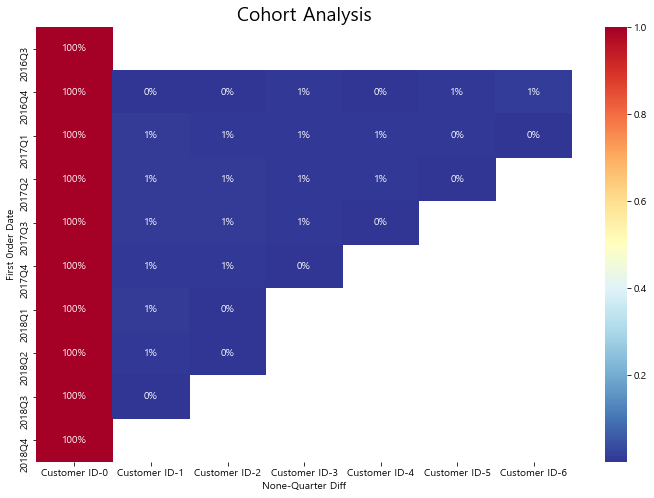

In [66]:
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('RdYlBu_r')
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%', cmap=cmap)
plt.show()